In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:

def rk4_step(f, x, Y, h):
    k1 = f(x, Y)
    k2 = f(x + h/2, Y + h/2 * k1)
    k3 = f(x + h/2, Y + h/2 * k2)
    k4 = f(x + h, Y + h * k3)
    return Y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

def integrate_ode4(f, x_range, Y0, num_points):
    a, b = x_range
    h = (b - a) / (num_points - 1)
    xs = np.linspace(a, b, num_points)
    Ys = np.zeros((num_points, len(Y0)))
    Ys[0] = Y0

    for i in range(1, num_points):
        Ys[i] = rk4_step(f, xs[i-1], Ys[i-1], h)

    return xs, Ys

# Shooting method for second-order ODE: y'' + p(x)y' + q(x)y = r(x)
def shooting_method4(p_func, q_func, r_func, a, b, y_a, y_b, num_points=1000):
    # Define the system using y and z (where z = dy/dx)
    def ode_system(x, Y):
        y, z = Y  # z = dy/dx
        dy_dx = z
        dz_dx = -p_func(x)*z - q_func(x)*y + r_func(x)
        return np.array([dy_dx, dz_dx])
    
    # IVP 1: y'(a) = 0
    x1, Y1 = integrate_ode4(ode_system, (a, b), [y_a, 0], num_points)
    
    # IVP 2: y'(a) = 1
    x2, Y2 = integrate_ode4(ode_system, (a, b), [y_a, 1], num_points)

    y1_b = Y1[-1, 0]
    y2_b = Y2[-1, 0]

    # Compute h using linear interpolation
    lambda_ = (y_b - y1_b) / (y2_b - y1_b)
    y_comb = Y1[:, 0] + lambda_ * (Y2[:, 0] - Y1[:, 0])
 
    return x1, y_comb, lambda_, Y1[:, 0], Y2[:, 0]



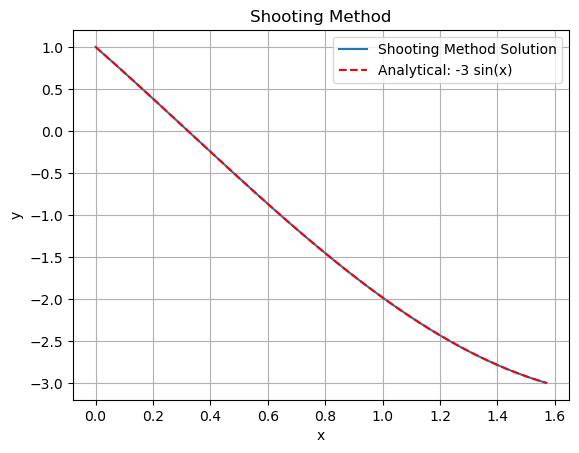

Shooting Method Scaling Factor h = -3.000000
Error at x = pi/2: 0.000000e+00


In [7]:
#Q1 
y'' = -y, y(0)=0, y(pi/2) = -3
p = lambda x: 0
q = lambda x: 1
r = lambda x: 0

a = 0
b = np.pi / 2
y_a = 1
y_b = -3

x_vals, y_vals, h, y1_vals, y2_vals = shooting_method4(p, q, r, a, b, y_a, y_b, num_points=1000)

# Plotting
plt.plot(x_vals, y_vals, label='Shooting Method Solution')
plt.plot(x_vals, -3*np.sin(x_vals) + np.cos(x_vals), 'r--', label='Analytical: -3 sin(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shooting Method')
plt.grid(True)
plt.show()

# Print results
print(f"Shooting Method Scaling Factor h = {h:.6f}")
print(f"Error at x = pi/2: {y_vals[-1] - y_b:.6e}")


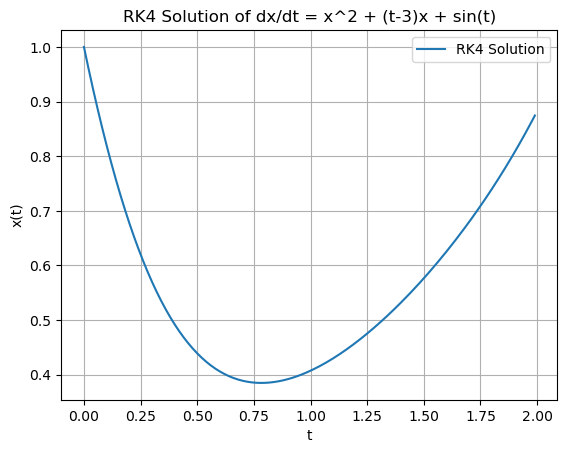

In [47]:
#Q2

def RK4(G, y0, h, initial, final):
    xs = []
    fx_s = []
    x = initial 
    fx = y0

    while x<=final:
       xs.append(x)
       fx_s.append(fx)
       
       k1 = h * G(x, fx)
       k2 = h * G(x +(h/2.0), fx + (k1/2.0))
       k3 = h * G(x +(h/2.0), fx + (k2/2.0))
       k4 = h * G(x + h, fx + k3)
       fx_next = fx + ((1/3)*((k1/2.0) + k2 + k3 +(k4/2.0)))
    #update 
       x += h
       fx = fx_next

    return np.array(xs), np.array(fx_s)
    
    
def G(t, x):
    return x**2 + (t - 3)*x + np.sin(t)
    
t0 = 0
x0 = 1  # example initial value
t_final = 2
h = 0.01

T, X = RK4(G, x0, h, t0, t_final)

plt.plot(T, X, label='RK4 Solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.title("RK4 Solution of dx/dt = x^2 + (t-3)x + sin(t)")
plt.show()

Iter 1: z_guess = -8.350009, y(L) = 3.075090
Iter 2: z_guess = -8.282380, y(L) = 3.003046
Iter 3: z_guess = -8.279521, y(L) = 3.000012
Iter 4: z_guess = -8.279509, y(L) = 3.000000
Converged!


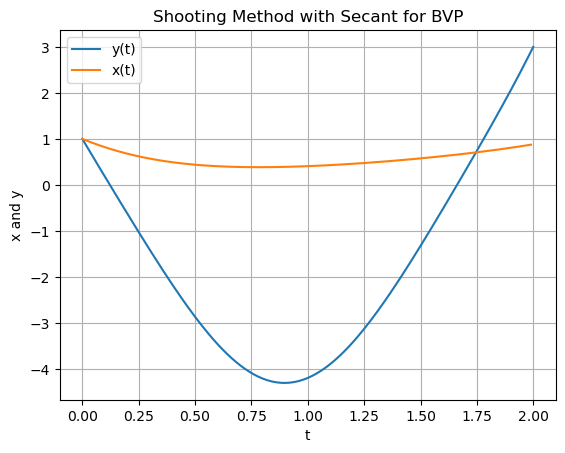

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2nd order ODE as a system of first order ODEs:
# dy/dx = z
# dz/dx = f(x, y, z)

def f(x, y, z):
    # Example ODE for dy/dx = z and dz/dx = f(x, y, z)
    # Replace this with your actual f(x, y, z)
    return y**2 + np.sqrt(x**2 + 1) + np.cos(x) * x  # just example

# RK4 integrator for system dy/dx=z, dz/dx=f
def RK4_system(f, y0, z0, x0, xf, h):
    xs = [x0]
    ys = [y0]
    zs = [z0]

    x = x0
    y = y0
    z = z0

    while x < xf:
        k1y = h * z
        k1z = h * f(x, y, z)

        k2y = h * (z + k1z/2)
        k2z = h * f(x + h/2, y + k1y/2, z + k1z/2)

        k3y = h * (z + k2z/2)
        k3z = h * f(x + h/2, y + k2y/2, z + k2z/2)

        k4y = h * (z + k3z)
        k4z = h * f(x + h, y + k3y, z + k3z)

        y += (k1y + 2*k2y + 2*k3y + k4y)/6
        z += (k1z + 2*k2z + 2*k3z + k4z)/6
        x += h

        xs.append(x)
        ys.append(y)
        zs.append(z)

    return np.array(xs), np.array(ys), np.array(zs)

# Shooting method with secant method update for initial slope
def shooting_method_secant(f, y0, yL, x0, xL, h, z0_guess, z1_guess, tol=1e-5, max_iter=50):
    # First guess
    xs, ys, zs = RK4_system(f, y0, z0_guess, x0, xL, h)
    phi0 = ys[-1]

    # Second guess
    xs, ys, zs = RK4_system(f, y0, z1_guess, x0, xL, h)
    phi1 = ys[-1]

    for i in range(max_iter):
        # Secant update formula
        z_new = z1_guess + (yL - phi1)*(z1_guess - z0_guess)/(phi1 - phi0)

        xs, ys, zs = RK4_system(f, y0, z_new, x0, xL, h)
        phi_new = ys[-1]

        print(f"Iter {i+1}: z_guess = {z_new:.6f}, y(L) = {phi_new:.6f}")

        if abs(phi_new - yL) < tol:
            print("Converged!")
            return xs, ys, zs

        # Update guesses
        z0_guess, phi0 = z1_guess, phi1
        z1_guess, phi1 = z_new, phi_new

    print("Did not converge within max iterations")
    return xs, ys, zs

# Parameters example (replace with your values)
x0 = 0
xL = 2
y0 = 1    # y(0)
yL = 3    # y(L)

h = 0.01

# Initial guesses for y'(0)
z0_guess = -10
z1_guess = -9

# Run shooting method
xs, ys, zs = shooting_method_secant(f, y0, yL, x0, xL, h, z0_guess, z1_guess)

# Plot results
plt.plot(xs, ys, label='y(t)')
plt.plot(T, X, label='x(t)')
plt.xlabel('t')
plt.ylabel('x and y')
plt.title('Shooting Method with Secant for BVP')
plt.legend()
plt.grid()
plt.show()


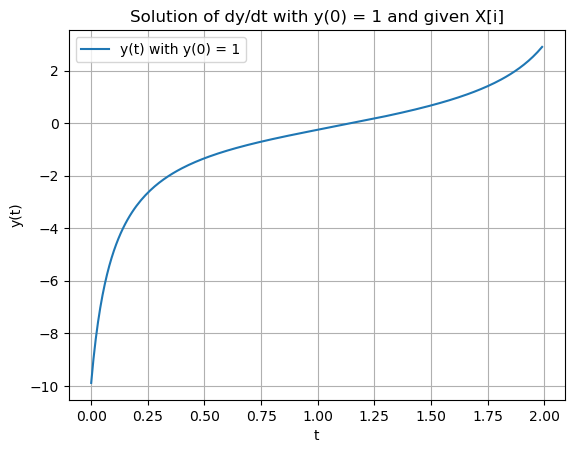

y(2) = 2.905842452391529


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define dy/dt
def H(t, y, x_val):
    return y**2 + np.sqrt(t**2 + 1) + np.cos(t) * x_val

# RK4 for y(t) using given X[i]
def RK4_y_given_X(X, y0, h, t0, tf):
    N = len(X)
    ts = []
    ys = []
    y = y0
    t = t0
    for i in range(N):
        ts.append(t)
        ys.append(y)
        if abs(y) > 1e6:
            print(f"y exploded at t={t:.2f}, y={y}")
            break
        k1 = h * H(t, y, X[i])
        k2 = h * H(t + h/2, y + k1/2, X[i])
        k3 = h * H(t + h/2, y + k2/2, X[i])
        k4 = h * H(t + h, y + k3, X[i])
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
    return np.array(ts), np.array(ys)

# === X(t) from previous RK4 ===
def G(t, x):
    return x**2 + (t - 3)*x + np.sin(t)

def RK4(G, x0, h, t0, tf):
    ts = []
    xs = []
    t = t0
    x = x0
    while t <= tf:
        ts.append(t)
        xs.append(x)
        k1 = h * G(t, x)
        k2 = h * G(t + h/2, x + k1/2)
        k3 = h * G(t + h/2, x + k2/2)
        k4 = h * G(t + h, x + k3)
        x += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
    return np.array(ts), np.array(xs)

# Parameters
h = 0.01
t0, tf = 0, 2

# Solve x(t)
T_x, X = RK4(G, 1.0, h, t0, tf)

# Solve y(t) with y(0) = 1
y0 = -9.89
T_y, Y = RK4_y_given_X(X, y0, h, t0, tf)

# Plot result
plt.plot(T_y, Y, label='y(t) with y(0) = 1')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution of dy/dt with y(0) = 1 and given X[i]')
plt.grid(True)
plt.legend()
plt.show()

# Print final value
print(f"y(2) = {Y[-1] if len(Y) > 0 else 'undefined'}")


In [38]:
def H(t, y, X[i]):
    return y**2 + np.sqrt(t**2 +1) + np.cos(t) * X[i]

use shooting method for it given X array and y(t=2) = 3
    

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# === ODE for x ===
def G(t, x):
    return x**2 + (t - 3)*x + np.sin(t)

# === RK4 for x(t) ===
def RK4(G, x0, h, t0, tf):
    ts = []
    xs = []
    t = t0
    x = x0
    while t <= tf:
        ts.append(t)
        xs.append(x)
        k1 = h * G(t, x)
        k2 = h * G(t + h/2, x + k1/2)
        k3 = h * G(t + h/2, x + k2/2)
        k4 = h * G(t + h, x + k3)
        x += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
    return np.array(ts), np.array(xs)

# === dy/dt with given x(t) ===
def H(t, y, x_val):
    return y**2 + np.sqrt(t**2 + 1) + np.cos(t) * x_val

# === RK4 for y(t) using precomputed x(t) values ===
def RK4_y_given_X(X, y0, h, t0, tf):
    N = len(X)
    ts = []
    ys = []
    y = y0
    t = t0
    for i in range(N):
        ts.append(t)
        ys.append(y)
        if abs(y) > 1e6:
            return np.array(ts), np.array(ys + [float('inf')] * (N - len(ys)))
        k1 = h * H(t, y, X[i])
        k2 = h * H(t + h/2, y + k1/2, X[i])
        k3 = h * H(t + h/2, y + k2/2, X[i])
        k4 = h * H(t + h, y + k3, X[i])
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
    return np.array(ts), np.array(ys)

# === PARAMETERS ===
h = 0.001
t0, tf = 0, 2
x0 = 1
target_y2 = 3
tolerance = 0.01

# Step 1: Solve x(t)
T_x, X = RK4(G, x0, h, t0, tf)

# Step 2: Try guesses for y(0)
guesses = np.linspace(1.0, 4.0, 30)
best_guess = None

for y0_guess in guesses:
    T_y, Y = RK4_y_given_X(X, y0_guess, h, t0, tf)
    final_y = Y[-1]
    print(f"Trying y(0) = {y0_guess:.4f} → y(2) = {final_y:.4f}")
    if abs(final_y - target_y2) < tolerance:
        best_guess = y0_guess
        print(f"✅ Found a match: y(0) ≈ {y0_guess:.4f} gives y(2) ≈ {final_y:.4f}")
        break

# Step 3: Plot the result
if best_guess is not None:
    T_y, Y = RK4_y_given_X(X, best_guess, h, t0, tf)
    plt.plot(T_x, X, label='x(t)', linestyle='--')
    plt.plot(T_y, Y, label=f'y(t), y(0) ≈ {best_guess:.4f}', linewidth=2)
    plt.xlabel('t')
    plt.ylabel('Function Value')
    plt.title('Shooting Method for Coupled BVP')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("❌ Could not find a suitable y(0). Try increasing guess range or reducing step size.")


Trying y(0) = 1.0000 → y(2) = inf
Trying y(0) = 1.1034 → y(2) = inf
Trying y(0) = 1.2069 → y(2) = inf
Trying y(0) = 1.3103 → y(2) = inf
Trying y(0) = 1.4138 → y(2) = inf
Trying y(0) = 1.5172 → y(2) = inf
Trying y(0) = 1.6207 → y(2) = inf
Trying y(0) = 1.7241 → y(2) = inf
Trying y(0) = 1.8276 → y(2) = inf
Trying y(0) = 1.9310 → y(2) = inf
Trying y(0) = 2.0345 → y(2) = inf
Trying y(0) = 2.1379 → y(2) = inf
Trying y(0) = 2.2414 → y(2) = inf
Trying y(0) = 2.3448 → y(2) = inf
Trying y(0) = 2.4483 → y(2) = inf
Trying y(0) = 2.5517 → y(2) = inf
Trying y(0) = 2.6552 → y(2) = inf
Trying y(0) = 2.7586 → y(2) = inf
Trying y(0) = 2.8621 → y(2) = inf
Trying y(0) = 2.9655 → y(2) = inf
Trying y(0) = 3.0690 → y(2) = inf
Trying y(0) = 3.1724 → y(2) = inf
Trying y(0) = 3.2759 → y(2) = inf
Trying y(0) = 3.3793 → y(2) = inf
Trying y(0) = 3.4828 → y(2) = inf
Trying y(0) = 3.5862 → y(2) = inf
Trying y(0) = 3.6897 → y(2) = inf
Trying y(0) = 3.7931 → y(2) = inf
Trying y(0) = 3.8966 → y(2) = inf
Trying y(0) = 

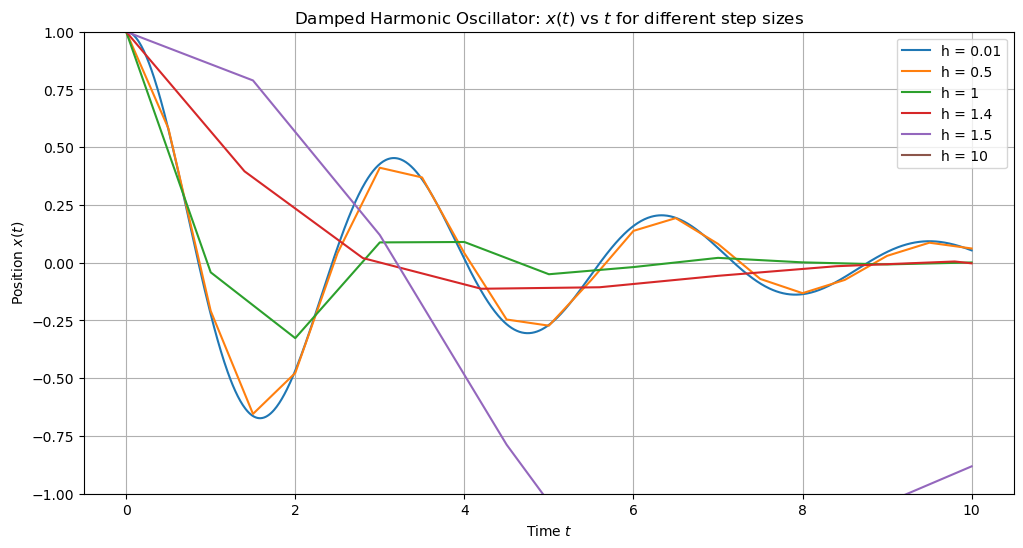

In [27]:
#Q3

def f(t, Y):
    x1, x2 = Y
    dx1dt = x2
    dx2dt = -0.5 * x2 - 4 * x1
    return np.array([dx1dt, dx2dt])


def rk4(t0, Y0, t_end, h):
    t_values = [t0]
    Y_values = [Y0]

    t = t0
    Y = Y0

    while t < t_end:
        if t + h > t_end:
            h = t_end - t

        k1 = f(t, Y)
        k2 = f(t + h/2, Y + h/2 * k1)
        k3 = f(t + h/2, Y + h/2 * k2)
        k4 = f(t + h, Y + h * k3)

        Y = Y + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        t += h

        t_values.append(t)
        Y_values.append(Y)

    return np.array(t_values), np.array(Y_values)

# Initial conditions
t0 = 0
t_end = 10
x0 = 1   # initial position
v0 = 0   # initial velocity


h_values = [0.01, 0.5, 1, 1.4, 1.5, 10]

plt.figure(figsize=(12, 6))

for h in h_values:
    t_vals, Y_vals = rk4(t0, np.array([x0, v0]), t_end, h)
    plt.plot(t_vals, Y_vals[:,0], label=f'h = {h}')

plt.title('Damped Harmonic Oscillator: $x(t)$ vs $t$ for different step sizes')
plt.xlabel('Time $t$')
plt.ylabel('Position $x(t)$')
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()



In [33]:
#Q4

def newton_raphson(f, f_prime, x0, tol):
    x = x0
    iterations = 0
    while True:
        f_x = f(x)
        f_prime_x = f_prime(x)
        iterations += 1

        x_new = x - f_x / f_prime_x

        if abs(f(x_new)) < tol:
            return x_new, iterations

        x = x_new

def f(x):
    return x**2 - 12

def f_prime(x):
    return 2*x


soln, iterations = newton_raphson(f, f_prime, 4, 10e-4)
print (soln)
print (iterations)


3.464101620029455
3
